In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline
import numpy as np

In [2]:
import os 
import zipfile
# file name 
local_zip ='house-prices-advanced-regression-techniques.zip'
#Class with methods to open, read, write, close, list zip files.
zip_ref = zipfile.ZipFile(file=local_zip,mode='r')

zip_ref.extractall('house-price')

In [3]:
#keep_default_na=False to prevent panda to interpreting na NaN , Na IS No Basement 
df = pd.read_csv('house-price/train.csv', keep_default_na=True,
                 na_values=['-1.#IND', '1.#QNAN',
                            '1.#IND', '-1.#QNAN','', '#N/A',       
                             'N/A',  '#NA', 'NULL', 'NaN', '-NaN', 'nan', '-nan'])


In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.drop(labels='Id',axis=1,inplace=True)

In [6]:
df['SalePrice'].describe()
# check min >0

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\negi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


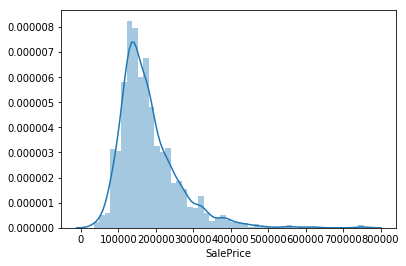

In [7]:
sns.distplot(df['SalePrice'])
# positive skewness

In [8]:
print('skewness %f'%df['SalePrice'].skew())
print('Kurtosis %f'%df['SalePrice'].kurt())

skewness 1.882876
Kurtosis 6.536282


In [9]:
plt.figure(figsize=(20,20))
test=df.corr()['SalePrice']
test.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<Figure size 1440x1440 with 0 Axes>

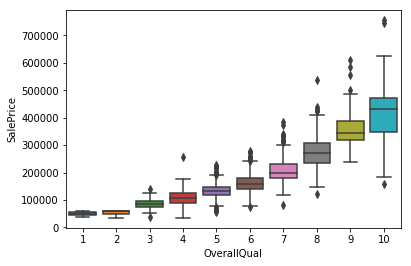

In [10]:
#SalePriceis perpostional to OverallQual
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)

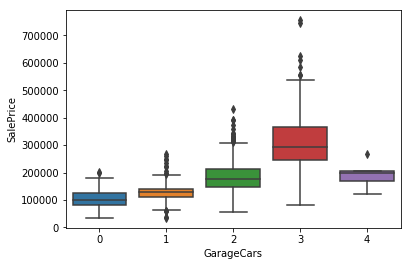

In [11]:
data = pd.concat([df['SalePrice'], df['GarageCars']], axis=1)
fig = sns.boxplot(x='GarageCars', y="SalePrice", data=data)

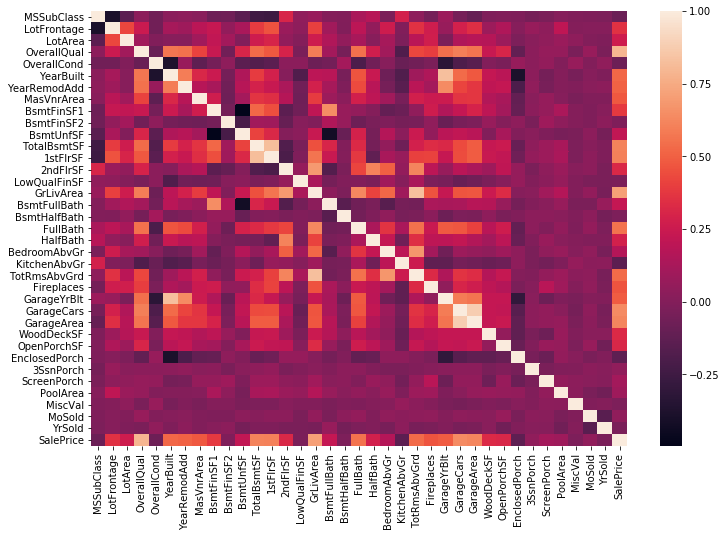

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())

In [13]:
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

# checking Missing  value(Nan)

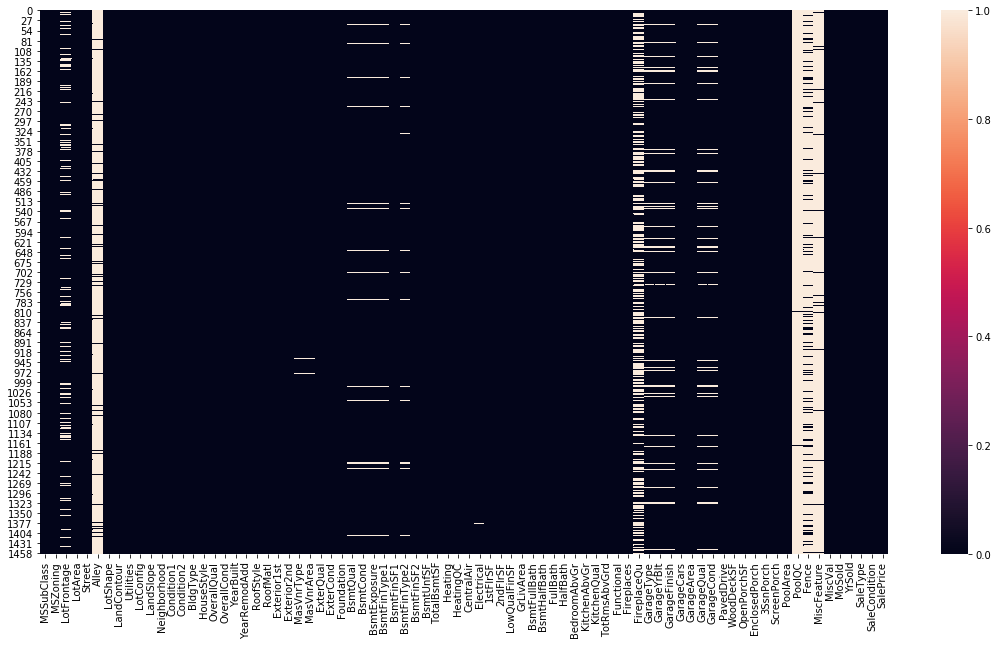

In [14]:
plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())

In [15]:
# remove 'MiscFeature','PoolQC','Fence','Alley'... very large number of value are missing 
df=df.drop(labels=['MiscFeature','PoolQC','Fence','Alley','FireplaceQu','LotFrontage'],axis=1)
df.shape

(1460, 74)

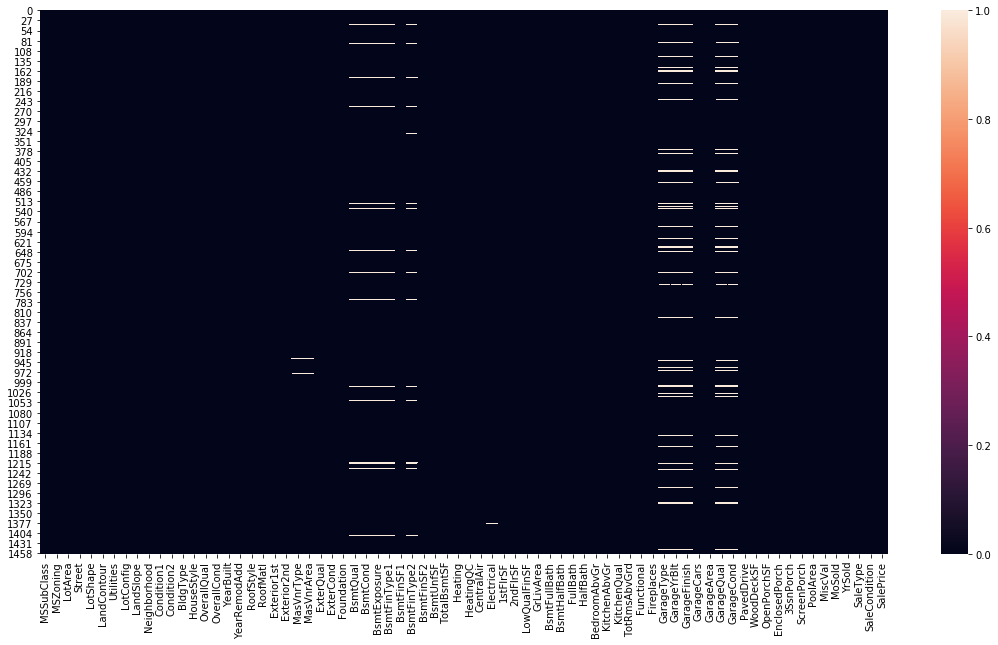

In [16]:
plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())
# few null are still remaning

In [17]:
#y=df.isnull().sum()
#y2 = pd.DataFrame(data=y)
#y2[y2[0]>0]
#All null value in decending order
df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False)

GarageCond      81
GarageQual      81
GarageFinish    81
GarageYrBlt     81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrArea       8
MasVnrType       8
Electrical       1
dtype: int64

In [18]:
#correlation with SalePrice
a=df.corr()['SalePrice']
a.sort_values(ascending=False)[:20]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64

In [19]:
df[a.sort_values(ascending=False)[:20].index].isnull().sum()

SalePrice        0
OverallQual      0
GrLivArea        0
GarageCars       0
GarageArea       0
TotalBsmtSF      0
1stFlrSF         0
FullBath         0
TotRmsAbvGrd     0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt     81
MasVnrArea       8
Fireplaces       0
BsmtFinSF1       0
WoodDeckSF       0
2ndFlrSF         0
OpenPorchSF      0
HalfBath         0
LotArea          0
dtype: int64

In [20]:
# fill most frequent year:
#Year garage was built
df['GarageYrBlt'].fillna(value=df['GarageYrBlt'].mode()[0],inplace=True)
df[a.sort_values(ascending=False)[:20].index].isnull().sum()
#Masonry veneer area in square feet
df['MasVnrArea'].fillna(value=df['MasVnrArea'].mode()[0],inplace=True)
df[a.sort_values(ascending=False)[:20].index].isnull().sum()

SalePrice       0
OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
dtype: int64

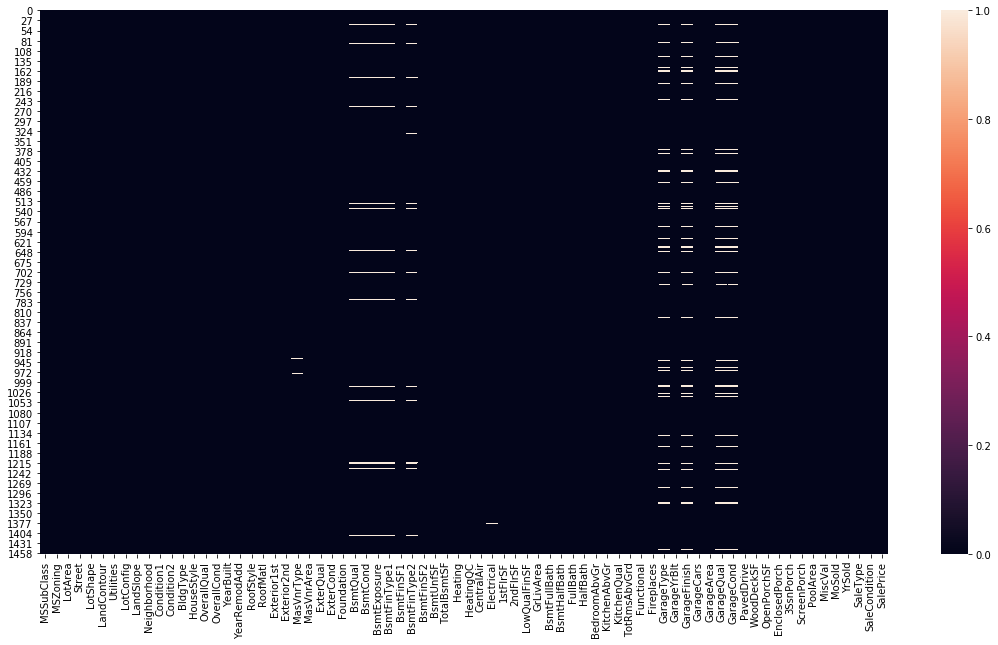

In [21]:
# only string type value has null
plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())

# change string value to numerical

In [22]:
#col which has null value
total_null=df.isnull().sum()
#All null value in decending order
null=df.isnull().sum()[total_null>0].sort_values(ascending=False)
# take index
index=null.index
# store in new file
new_null=df[index]
new_null.head()


,GarageCond,GarageQual,GarageFinish,GarageType,BsmtFinType2,BsmtExposure,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical
0,TA,TA,RFn,Attchd,Unf,No,GLQ,TA,Gd,BrkFace,SBrkr
1,TA,TA,RFn,Attchd,Unf,Gd,ALQ,TA,Gd,None,SBrkr
2,TA,TA,RFn,Attchd,Unf,Mn,GLQ,TA,Gd,BrkFace,SBrkr
3,TA,TA,Unf,Detchd,Unf,No,ALQ,Gd,TA,None,SBrkr
4,TA,TA,RFn,Attchd,Unf,Av,GLQ,TA,Gd,BrkFace,SBrkr


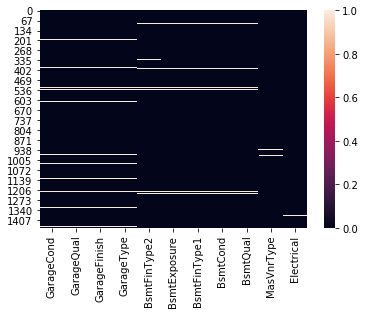

In [23]:
sns.heatmap(new_null.isnull())

In [24]:
new_null.isnull().sum()

GarageCond      81
GarageQual      81
GarageFinish    81
GarageType      81
BsmtFinType2    38
BsmtExposure    38
BsmtFinType1    37
BsmtCond        37
BsmtQual        37
MasVnrType       8
Electrical       1
dtype: int64

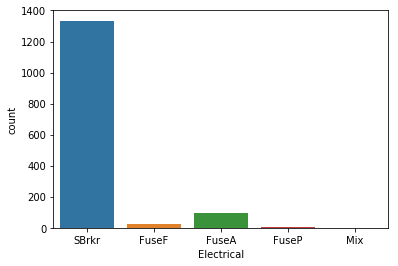

In [25]:
#Electrical only one null
sns.countplot(x='Electrical',data=df)

In [26]:
df['Electrical'].fillna(value='SBrkr',inplace=True)

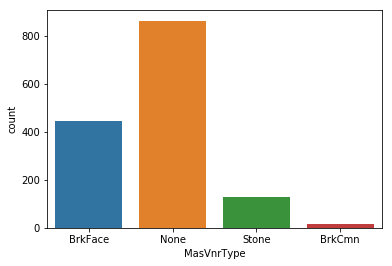

In [27]:
# 8 missing value  , ,Masonry veneer type
sns.countplot('MasVnrType',data=df)

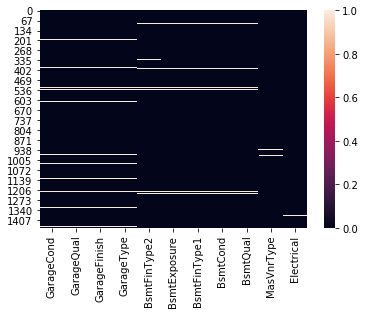

In [28]:
sns.heatmap(new_null.isnull())

In [29]:
df['MasVnrType'].fillna(value='None',inplace=True)

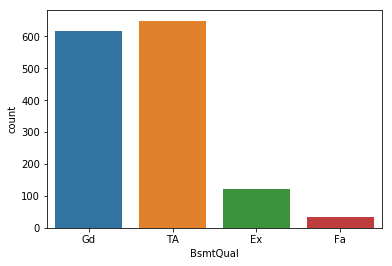

In [30]:
#BsmtQual: Evaluates the height of the basement
#37 missing value
#Ex	Excellent (100+ inches)
# Gd	Good (90-99 inches)
# TA	Typical (80-89 inches)
# Fa	Fair (70-79 inches)
# Po	Poor (<70 inches
# NA	No Basement
sns.countplot(x='BsmtQual',data=df)

#by plotting graph for 
#BsmtQual 38
#BsmtFinType2    38
#BsmtExposure    38
#BsmtFinType1    37
#BsmtCond
each has no record of 'No Basement'  so NaN can be 'No Basement' 

In [31]:

# no Basement same for BsmtFinType2    38
#BsmtExposure    38
#BsmtFinType1    37
#BsmtCond
col=['BsmtFinType1','BsmtCond','BsmtExposure','BsmtFinType2','BsmtQual'];
for i in col:
    df[i].fillna(value='NA',inplace=True)

# Garage missing value
#GarageCond      81
#GarageQual      81
#GarageFinish    81
#GarageType      81


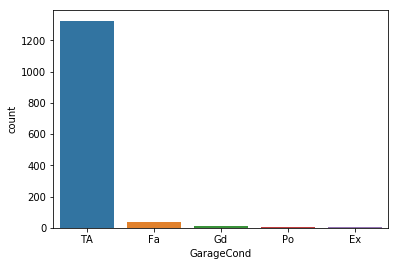

In [32]:
sns.countplot(x='GarageCond',data=df)

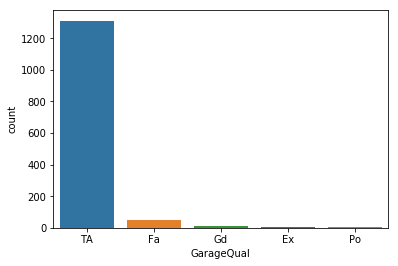

In [33]:
sns.countplot(x='GarageQual',data=df)

no detail about NA	No Garage case 
nake nan as Na(No Garage)

In [34]:
col=['GarageCond','GarageQual','GarageFinish','GarageType'];
for i in col:
    df[i].fillna(value='NA',inplace=True)
    

In [35]:
#col which has null value()
null_value=df[df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).index]
null_value.head()


""
0
1
2
3
4


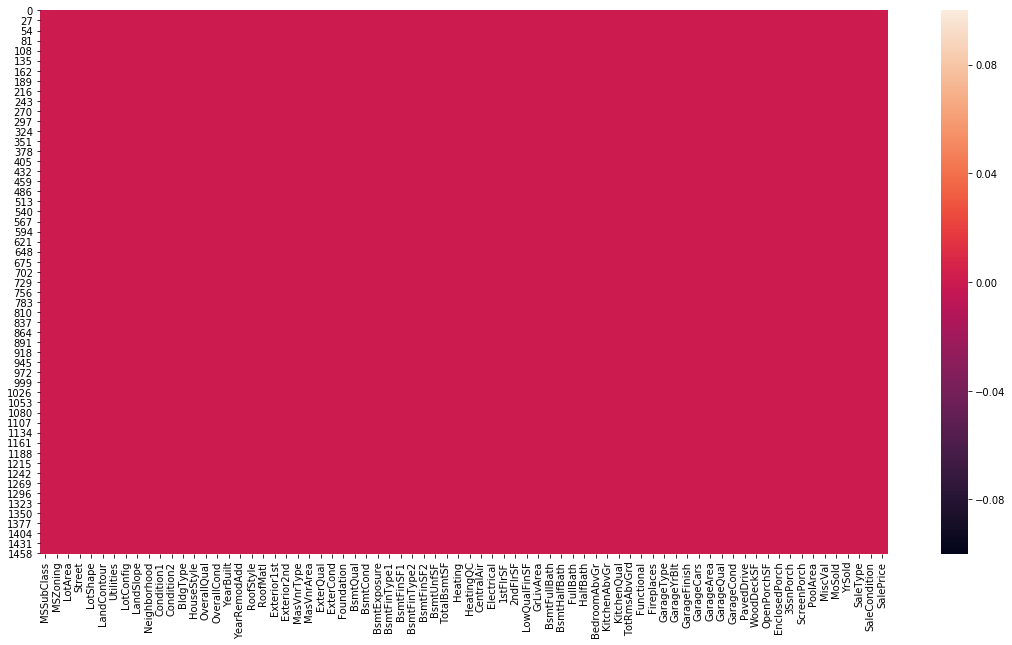

In [36]:
# no null value 
plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())

# Convert string to int

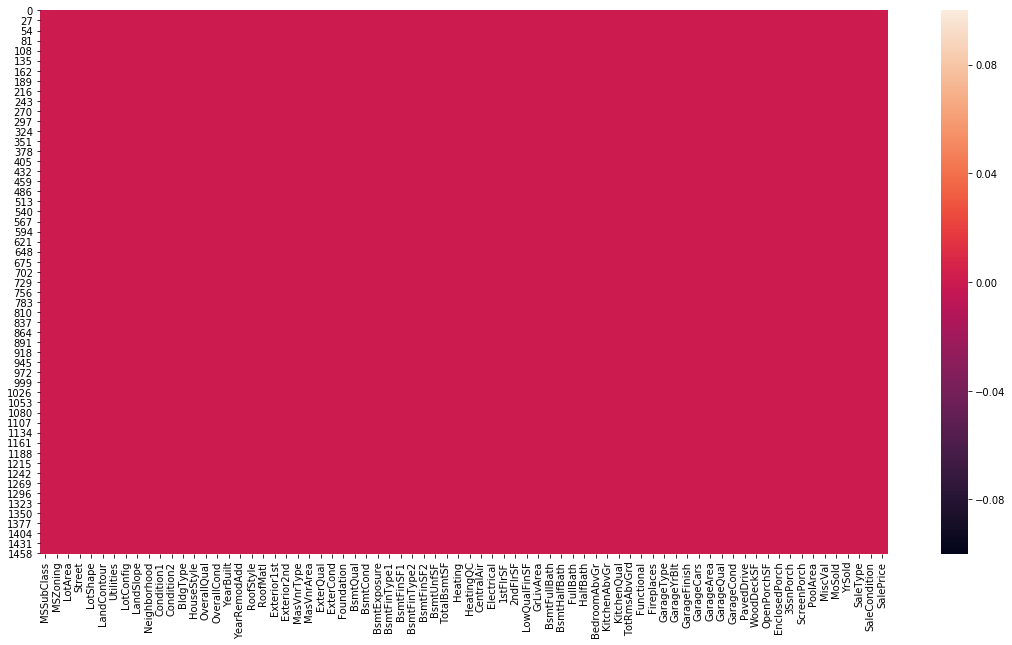

In [37]:
plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())

In [38]:
'''
df['MSZoning']=df['MSZoning'].map( {'A':0,'C':1,'FV':2,'I':3,'RH':4,'RL':5,'RP':6,'RM':7},na_action=True)

df['Street'] =df['Street'].map({'Grvl':0,'Pave':1})
df['LotShape']=df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})
df['LandContour']= df['LandContour'].map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})
df['Utilities']=df['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})
df['LotConfig']=df['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})
''' 

"\ndf['MSZoning']=df['MSZoning'].map( {'A':0,'C':1,'FV':2,'I':3,'RH':4,'RL':5,'RP':6,'RM':7},na_action=True)\n\ndf['Street'] =df['Street'].map({'Grvl':0,'Pave':1})\ndf['LotShape']=df['LotShape'].map({'Reg':0,'IR1':1,'IR2':2,'IR3':3})\ndf['LandContour']= df['LandContour'].map({'Lvl':0,'Bnk':1,'HLS':2,'Low':3})\ndf['Utilities']=df['Utilities'].map({'AllPub':0,'NoSewr':1,'NoSeWa':2,'ELO':3})\ndf['LotConfig']=df['LotConfig'].map({'Inside':0,'Corner':1,'CulDSac':2,'FR2':3,'FR3':4})\n"

MSZoning
['RL', 'RM', 'C (all)', 'FV', 'RH']
Street
['Pave', 'Grvl']
LotShape
['Reg', 'IR1', 'IR2', 'IR3']
LandContour
['Lvl', 'Bnk', 'Low', 'HLS']
Utilities
['AllPub', 'NoSeWa']
LotConfig
['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3']
LandSlope
['Gtl', 'Mod', 'Sev']
Neighborhood
['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst', 'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes', 'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert', 'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU', 'Blueste']
Condition1
['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA', 'RRNe']
Condition2
['Norm', 'Artery', 'RRNn', 'Feedr', 'PosN', 'PosA', 'RRAn', 'RRAe']
BldgType
['1Fam', '2fmCon', 'Duplex', 'TwnhsE', 'Twnhs']
HouseStyle
['2Story', '1Story', '1.5Fin', '1.5Unf', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin']
RoofStyle
['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed']
RoofMatl
['CompShg', 'WdShngl', 'Metal', 'WdShake', 'Membran', 'Tar&Grv', '

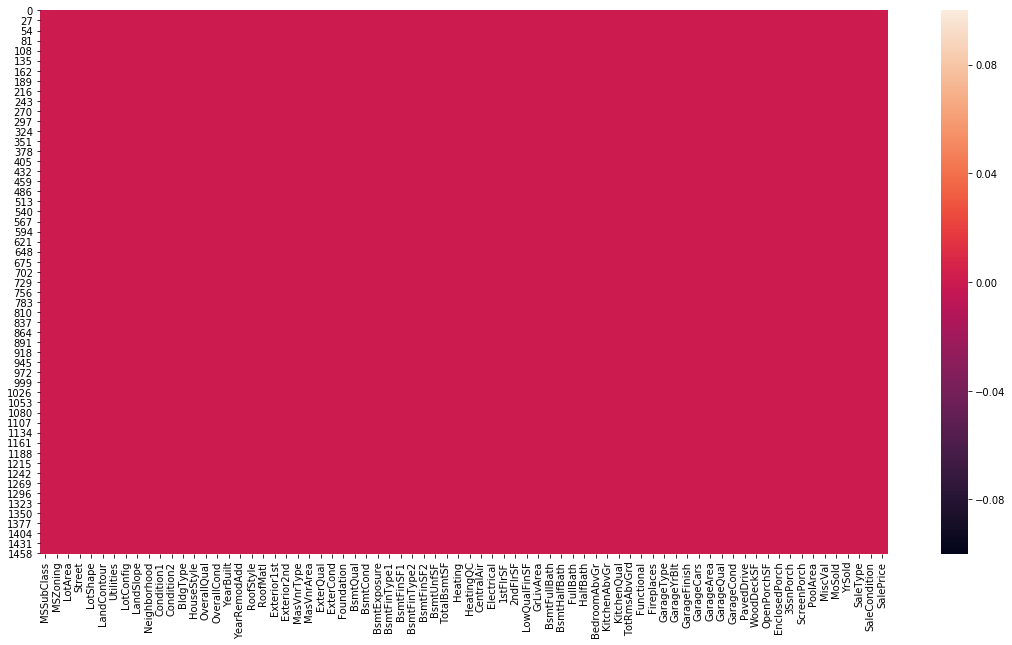

In [39]:

default_data={}
#find unique string
list_col=df.columns
for col in list_col:
    # only str colums

    if(isinstance(df[col].iloc[1], str)):
          print(col)
    else:
        continue
    #find unique string
    p=list(df[col].unique())
    print(p)
    l=len(p)
    j=0
    for j in range(l):
        default_data.update({p.pop():j})
       
    #print(default_data)
    
    df[col]=df[col].map(default_data)
    default_data={}    



plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())





In [40]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
                ..
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [41]:
#Multicollinearity (remove)

df.drop(labels=["GarageArea","TotRmsAbvGrd","2ndFlrSF","1stFlrSF","GarageYrBlt"],axis=1,inplace=True)

In [42]:
#df=pd.get_dummies(df)

In [43]:
df=df[df.corr().columns]


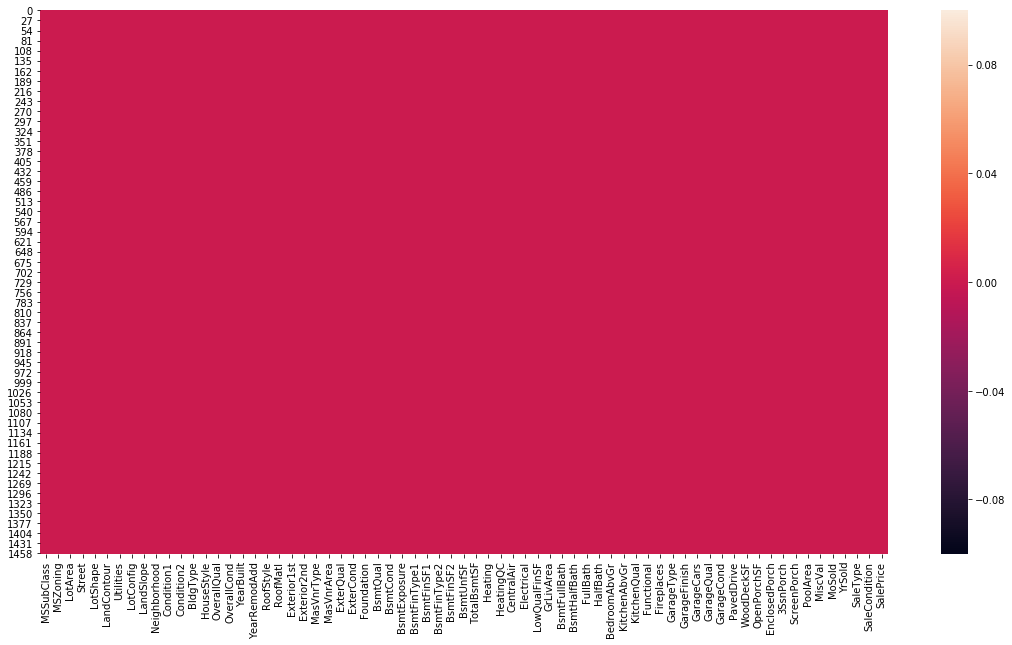

In [44]:
plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())


In [45]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

1.8828757597682129
6.536281860064529


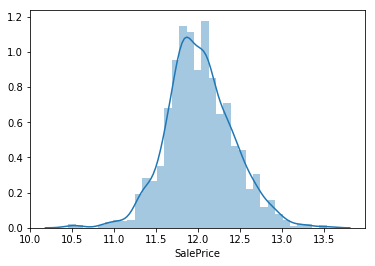

In [46]:

#df['SalePrice']=np.log(np.log(df['SalePrice']))

sns.distplot(np.log((df['SalePrice'])))
df['SalePrice']=np.log(df['SalePrice'])

In [47]:
#find unique string

In [48]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, confusion_matrix,classification_report
from sklearn.linear_model import  Ridge, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict

X=df.drop(labels='SalePrice',axis=1)
y=df['SalePrice']
#X=X[X.columns[1:20]]


x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33)


def model_eval(model):
    print(model)
    X=x_train
    y=y_train
    print('train--data')
    model_fit = model.fit(X, y)
    R2 = cross_val_score(model_fit, X, y, cv=10 , scoring='r2').mean()
    MSE = -cross_val_score(lr, X, y, cv=10 , scoring='neg_mean_squared_error').mean()
    print('R2 Score:', R2, '|', 'MSE:', MSE)
    X=x_test
    y=y_test
    print('test--data')
    y_pred=model.predict(X)
    R2 = cross_val_score(model_fit, X, y_test, cv=10 , scoring='r2').mean()
    MSE = -cross_val_score(lr, X, y, cv=10 , scoring='neg_mean_squared_error').mean()
    print('R2 Score:', R2, '|', 'MSE:', MSE)

lr=LinearRegression()
ri = Ridge(alpha=0.1, normalize=False)
ricv = RidgeCV(cv=5)
gdb = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1)
for model in [lr,ri,ricv,gdb]:
    model_eval(model)
    


print('on traning data')
#lr.fit(x_train,y_train)
y_pred=ri.predict(X)
score = cross_val_score(ri.fit(x_train,y_train), x_train, y_train, cv=10 , scoring='r2').mean()
print(score)
X=df.drop(labels='SalePrice',axis=1)
y=df['SalePrice']

gdb.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
train--data
R2 Score: 0.8913437346359434 | MSE: 0.016546233722363874
test--data
R2 Score: 0.7632504206696883 | MSE: 0.0412920303586732
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
train--data
R2 Score: 0.8914471376140145 | MSE: 0.016546233722363874
test--data
R2 Score: 0.7636488754407579 | MSE: 0.0412920303586732
RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)
train--data
R2 Score: 0.8915437258887933 | MSE: 0.016546233722363874
test--data


C:\Users\negi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\negi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\negi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\negi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarn

R2 Score: 0.767465261378482 | MSE: 0.0412920303586732
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)
train--data
R2 Score: 0.8877907245014489 | MSE: 0.016546233722363874
test--data
R2 Score: 0.8598138875198122 | MSE: 0.0412920303586732
on traning data
0.8914471376140145


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=300, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [148]:
print(df['SalePrice'].skew())
print(df['SalePrice'].kurt())

0.12133506220520406
0.8095319958036296


In [149]:
df['SalePrice'].isnull().sum()

0

In [150]:
df.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4,8450,1,3,3,1,4,2,24,...,0,0,0,0,0,2,2008,8,5,12.247694
1,20,4,9600,1,3,3,1,3,2,23,...,0,0,0,0,0,5,2007,8,5,12.109011
2,60,4,11250,1,2,3,1,4,2,24,...,0,0,0,0,0,9,2008,8,5,12.317167
3,70,4,9550,1,2,3,1,2,2,22,...,272,0,0,0,0,2,2006,8,4,11.849398
4,60,4,14260,1,2,3,1,3,2,21,...,0,0,0,0,0,12,2008,8,5,12.429216


In [151]:
test_df = pd.read_csv('house-price/test.csv')
test_df.shape
test_df.drop(labels='Id',axis=1,inplace=True)

In [152]:
test_df=test_df.drop(labels=['MiscFeature','PoolQC','Fence','Alley','FireplaceQu','LotFrontage'],axis=1)

In [153]:
test_df.corr().index

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [154]:
test_df.shape

(1459, 73)

In [155]:
# fill most frequent year:
#Year garage was built
test_df['GarageYrBlt'].fillna(value=test_df['GarageYrBlt'].mode()[0],inplace=True)
#tMasonry veneer area in square feet
test_df['MasVnrArea'].fillna(value=test_df['MasVnrArea'].mode()[0],inplace=True)

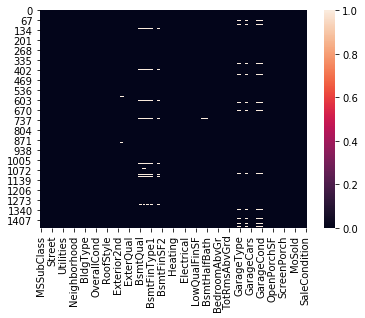

In [156]:
sns.heatmap(test_df.isnull())

In [157]:
#Multicollinearity (remove)
test_df.drop(labels=["GarageArea","TotRmsAbvGrd","2ndFlrSF","1stFlrSF","GarageYrBlt"],axis=1,inplace=True)

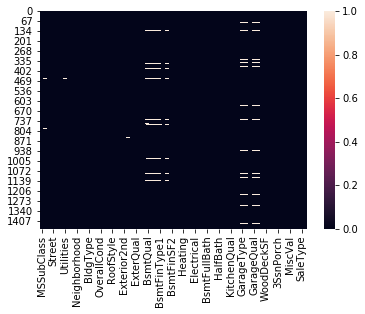

In [158]:
#test_df=test_df[test_df.corr().columns]

#test_df = pd.get_dummies(test_df)
sns.heatmap(test_df.isnull())

In [159]:
test_df.shape

(1459, 68)

In [160]:
X.shape

(1460, 68)

In [161]:
test_df['BsmtHalfBath'].fillna(value=test_df['BsmtHalfBath'].mode()[0],inplace=True)
test_df['GarageCars'].fillna(value=test_df['GarageCars'].mode()[0],inplace=True)
test_df['BsmtFullBath'].fillna(value=test_df['BsmtFullBath'].mode()[0],inplace=True)
test_df['BsmtFinSF1'].fillna(value=test_df['BsmtFinSF1'].mode()[0],inplace=True)
test_df['BsmtFinSF2'].fillna(value=test_df['BsmtFinSF2'].mode()[0],inplace=True)
test_df['BsmtUnfSF'].fillna(value=test_df['BsmtUnfSF'].mode()[0],inplace=True)
test_df['TotalBsmtSF'].fillna(value=test_df['TotalBsmtSF'].mode()[0],inplace=True)


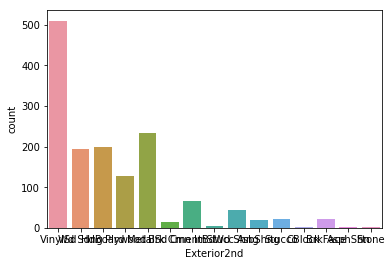

In [162]:
sns.countplot('Exterior2nd',data=test_df)

In [163]:
a=test_df.isnull().sum()
a.sort_values(ascending=False)[:20]


GarageCond      78
GarageQual      78
GarageFinish    78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MSZoning         4
Utilities        2
Functional       2
SaleType         1
Exterior2nd      1
Exterior1st      1
KitchenQual      1
BldgType         0
Condition2       0
LotArea          0
dtype: int64

In [164]:
col =['MasVnrType','MSZoning','Functional','Utilities','SaleType','Exterior1st','KitchenQual','Exterior2nd']
for col_i in col:
    test_df[col_i].fillna(value=test_df[col_i].mode()[0],inplace=True)


In [165]:
a=test_df.isnull().sum()
a.sort_values(ascending=False)[:20]

GarageCond      78
GarageFinish    78
GarageQual      78
GarageType      76
BsmtCond        45
BsmtExposure    44
BsmtQual        44
BsmtFinType2    42
BsmtFinType1    42
RoofStyle        0
RoofMatl         0
Exterior2nd      0
Exterior1st      0
YearBuilt        0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
YearRemodAdd     0
dtype: int64

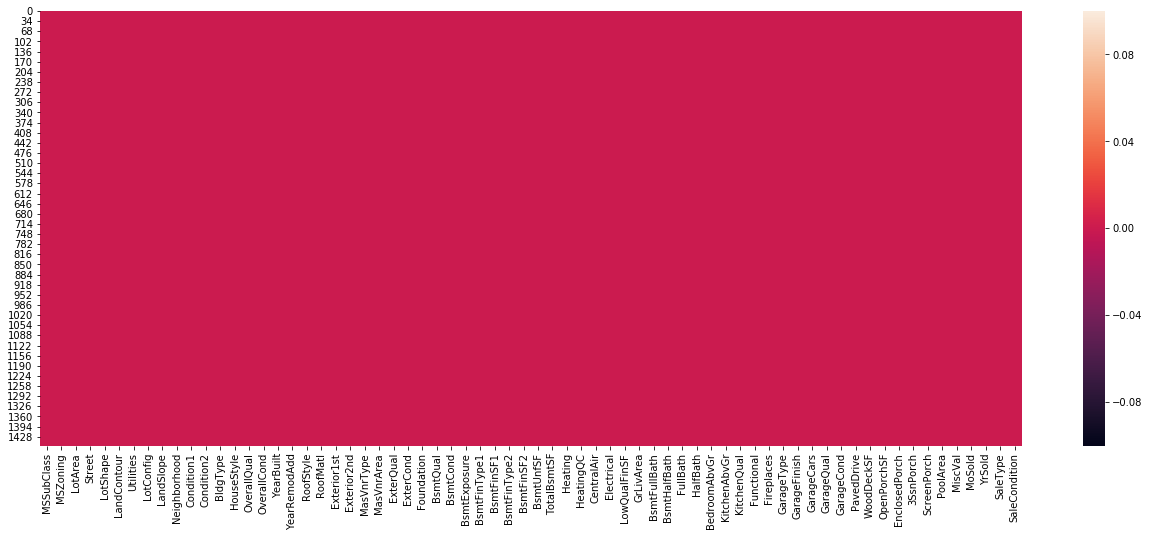

In [166]:
plt.figure(figsize=(22,8))

col=['GarageCond','GarageQual','GarageFinish','GarageType'];
for i in col:
    test_df[i].fillna(value='NA',inplace=True)
    col=['BsmtFinType1','BsmtCond','BsmtExposure','BsmtFinType2','BsmtQual'];
for i in col:
    test_df[i].fillna(value='NA',inplace=True)
sns.heatmap(test_df.isnull())

MSZoning
['RH', 'RL', 'RM', 'FV', 'C (all)']
Street
['Pave', 'Grvl']
LotShape
['Reg', 'IR1', 'IR2', 'IR3']
LandContour
['Lvl', 'HLS', 'Bnk', 'Low']
Utilities
['AllPub']
LotConfig
['Inside', 'Corner', 'FR2', 'CulDSac', 'FR3']
LandSlope
['Gtl', 'Mod', 'Sev']
Neighborhood
['NAmes', 'Gilbert', 'StoneBr', 'BrDale', 'NPkVill', 'NridgHt', 'Blmngtn', 'NoRidge', 'Somerst', 'SawyerW', 'Sawyer', 'NWAmes', 'OldTown', 'BrkSide', 'ClearCr', 'SWISU', 'Edwards', 'CollgCr', 'Crawfor', 'Blueste', 'IDOTRR', 'Mitchel', 'Timber', 'MeadowV', 'Veenker']
Condition1
['Feedr', 'Norm', 'PosN', 'RRNe', 'Artery', 'RRNn', 'PosA', 'RRAn', 'RRAe']
Condition2
['Norm', 'Feedr', 'PosA', 'PosN', 'Artery']
BldgType
['1Fam', 'TwnhsE', 'Twnhs', 'Duplex', '2fmCon']
HouseStyle
['1Story', '2Story', 'SLvl', '1.5Fin', 'SFoyer', '2.5Unf', '1.5Unf']
RoofStyle
['Gable', 'Hip', 'Gambrel', 'Flat', 'Mansard', 'Shed']
RoofMatl
['CompShg', 'Tar&Grv', 'WdShake', 'WdShngl']
Exterior1st
['VinylSd', 'Wd Sdng', 'HdBoard', 'Plywood', 'MetalSd

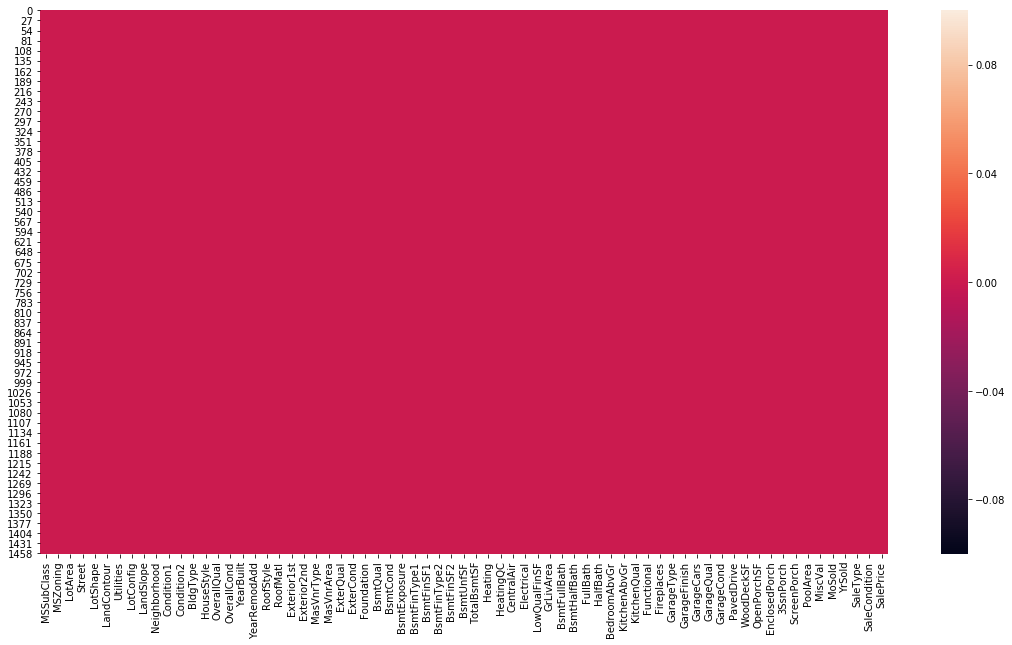

In [167]:

default_data={}
#find unique string
list_col=test_df.columns
for col in list_col:
    # only str colums

    if(isinstance(test_df[col].iloc[1], str)):
          print(col)
    else:
        continue
    #find unique string
    p=list(test_df[col].unique())
    print(p)
    l=len(p)
    j=0
    for j in range(l):
        default_data.update({p.pop():j})
       
    #print(default_data)
    
    test_df[col]=test_df[col].map(default_data)
    default_data={}    



plt.figure(figsize=(19,10))
sns.heatmap(data=df.isnull())





In [168]:

a=test_df.isnull().sum()
a.sort_values(ascending=False)[:20]

SaleCondition    0
ExterQual        0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterCond        0
SaleType         0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
dtype: int64

In [169]:
test_pred =gdb.predict(test_df)

In [170]:
predicted_prices=np.exp(test_pred)
predicted_prices

array([130375.56950238, 153022.09729354, 183541.7472883 , ...,
       165993.44657739, 112979.69879111, 245639.50941062])

# create submission file

In [171]:
for_id = pd.read_csv('house-price/test.csv')

my_submission = pd.DataFrame({'Id':for_id.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [172]:
a = pd.read_csv('submission.csv')

In [137]:
test_df.shape

(1459, 68)

In [138]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 62FF-CC49

 Directory of C:\Users\negi\Documents\house_prediction

20-03-2019  01:02    <DIR>          .
20-03-2019  01:02    <DIR>          ..
18-03-2019  12:34    <DIR>          .ipynb_checkpoints
20-03-2019  01:02         1,097,800 house_price.ipynb
18-03-2019  19:03    <DIR>          house-price
18-03-2019  11:10           195,824 house-prices-advanced-regression-techniques.zip
20-03-2019  00:48            31,939 sample_submission.csv
20-03-2019  01:02            35,897 submission.csv
               4 File(s)      1,361,460 bytes
               4 Dir(s)  402,020,102,144 bytes free


In [139]:
d=pd.read_csv('sample_submission.csv')
y_l=d['SalePrice']
y=df['SalePrice']


In [140]:
y_pred=gdb.predict(x_train)
score = cross_val_score(gdb.fit(x_train,y_train), x_train,y_train , cv=10 , scoring='r2').mean()
print(score)

0.888189027549393
